## Summary => <br>
This notebook includes the following topics. <br><br>

The notebook will be constructed in two stages. <br>
* 1st Stage -> Complete python implementations along with brief descriptions. (Est. Date of Completion - 28-03-2021)
* 2nd Stage -> Solving questions on these topics using python. (Est. Date of Completion - 31-04-2021)
* Continuous Development and Improvisations....

## Table of Contents

* Understanding Data types
    * Interval Scale
    * Binary 
    * Categorical
    * Ordinal 
    * Ratio Scaled
    * Mixed Type
* Different types of distances
* Simmilarity and Dissimilarity Matrix
* Familiarizing with different types of Error Metrics
* Handling Missing data values
* Central Tendency & Dispersion
* Descriptive Statistics
* Summary Statistics
    * Central Tendency Statistics
        * Arithmetic Mean
        * Weighted Mean
        * Median
        * Percentile
    * Dispersion
        * Skewness
        * Kurtosis
        * Range
        * Interquartile Range
        * Variance
        * Standard Score
        * Coefficient of Variation
* [Sample](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#16.-Sample-Statistics) vs [Population statistics](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#17.-Population-Statistics)
* Random Variables
* Probability Distribution Functions
    * Uniform Distribution
    * Exponential Distribution
    * [Binomial Distribution](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#8.-Binomial-Distribution)
    * [Normal Distributions](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#9.-Normal-Distribution)
    * [Poisson Distributions](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#10.-Poisson-Distribution)
    * [Bernoulli Distribution](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#11.-Bernoulli-Distribution)
* [Measuring p-value](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#13.-Calculating-p-Value)
* [Measuring Correlation](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#14.-Measuring-Correlation)
* [Measuring Variance](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#15.-Measuring-Variance)
* Expected Value

* [z-score](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#5.-Z-Test)
* Hypothesis Testing
    * Null & Alternate Hypothesis
    * Type 1 Error; Type 2 Error
    * Various Approaches
        * p-value
        * critical value
        * confidence interval value
* z-stats vs t-stats

* Two Sample Tests
* Confidence Interval
* Similarity & Dissimilarity Matrices
* [Central Limit Theorem](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#12.-Central-Limit-Theorem)
* [Chi Square Test](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#3.-Chi-Square-Test)
* [T Test](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#4.-T-Test)
* [ANOVA Test](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#6.-ANOVA-Test)
    * [One Way Anova Test](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#6.1-One-Way-ANOVA-Test)
        * F Test (LSD Test)
        * Tukey Kramer Test
    * [Two Way Anova Test](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#6.2-Two-Way-ANOVA-Test)
        * Interaction Effects
* [F Stats](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#7.-F-Stats-Test)
* [Regressions (Linear, Multiple) + ROC](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#2.-Regressions)
* Logistic Regression
    * Python Implementation
    * Calculating G Statistics
* Residual Analysis
* Maximum Likelihood Estimation
* Cluster Analysis
    * Partitioning Cluster Methods
        * K-Means
        * K Mediods
    * Hierarchial Cluster Methods
        * Agglomerative
    * Density Based Cluster Methods
        * DBSCAN
* [CART Algorithms](https://www.kaggle.com/antoreepjana/statistics-for-ml-data-analysis/#1.-CART-Algorithms)
    * Python Implementation
    * various Calculations involved
        * Information Gain
        * Gain Ratio
        * Gini Index
* Confusion Metrics, ROC & Regression Analysis
* Bonus Topics
    * Classification Thresholding
    * Prediction Bias
    * Sampling Methods
        * Simple
        * Convenience
        * Systematic
        * Cluster
        * Stratified

In [1]:
import numpy as np
import pandas as pd 
import os
import random
import statistics
from scipy import stats

In [2]:
random.seed(2021)
np.random.seed(2021)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. CART Algorithms

Brief Description -> 

##### Tools Used

Dataset Used -> Boston Dataset (UCI Machine Learning Repository)

In [4]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target

In [8]:
names = boston_dataset.feature_names

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
array = boston.values

X = array[:, 0:13]
Y = array[:, 13]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1234)

In [12]:
model = DecisionTreeRegressor(max_leaf_nodes = 20)

In [13]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_leaf_nodes=20)

In [14]:
from sklearn.metrics import r2_score

In [15]:
YHat = model.predict(X_test)

In [16]:
r2 = r2_score(Y_test, YHat)
print("R2 Score -> ", r2)

R2 Score ->  0.8567122297482948


### plot the decision tree as a graph 

In [17]:
import graphviz
from sklearn import tree

method 1

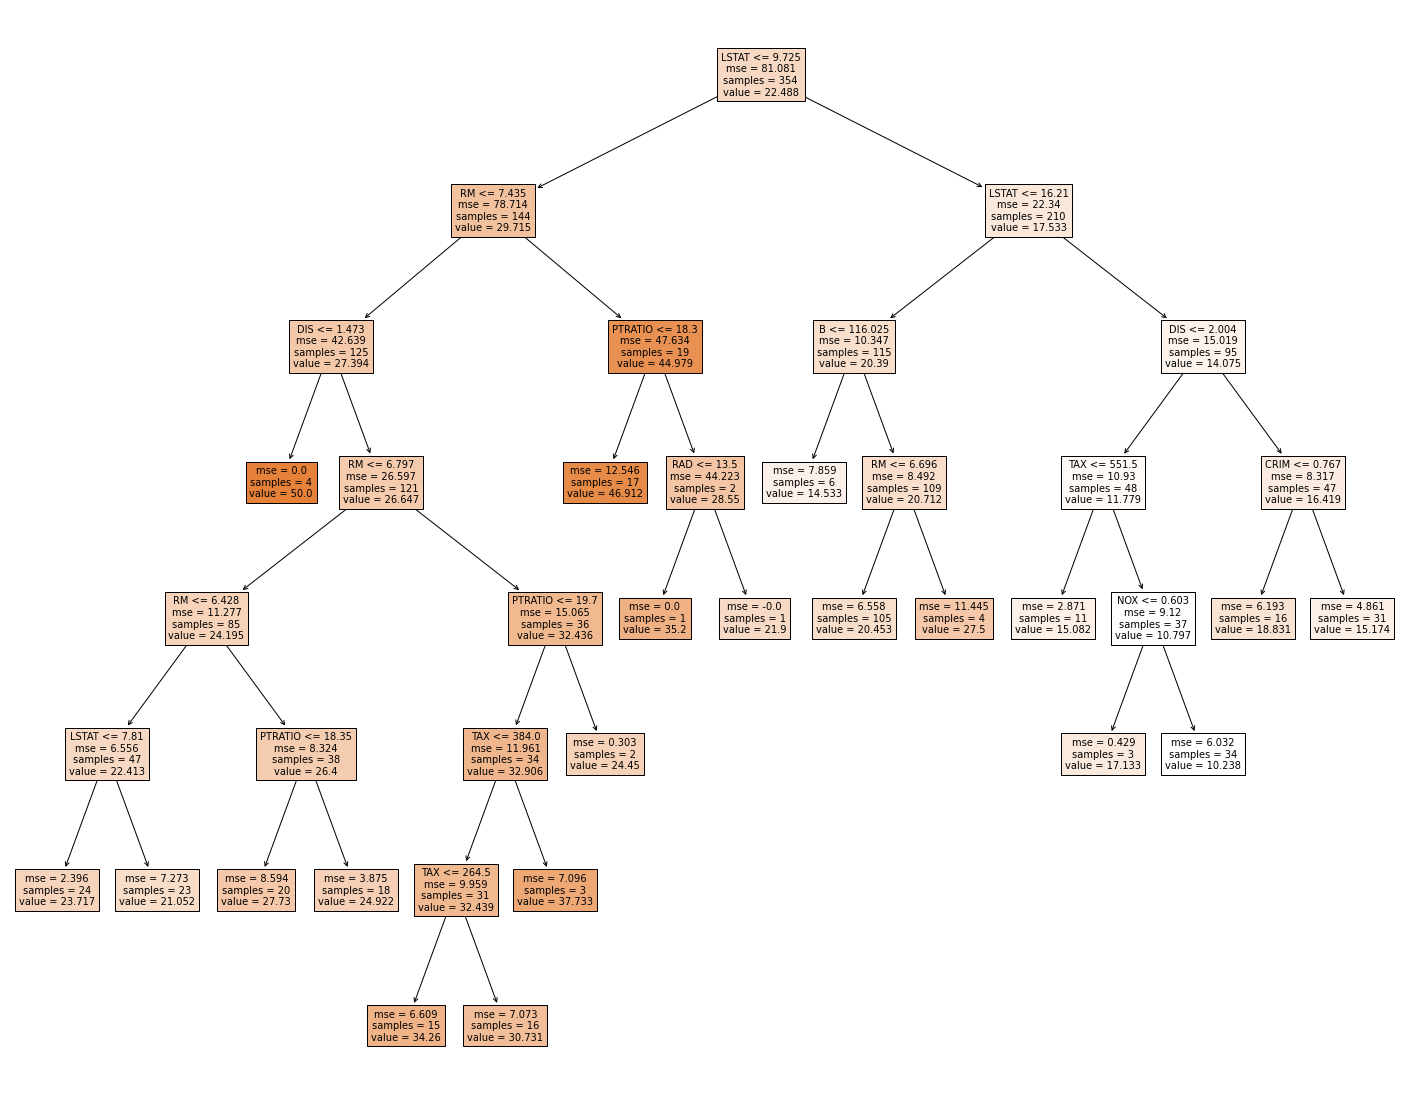

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=names,  
                   class_names=boston_dataset.target,
                   filled=True)

method 2

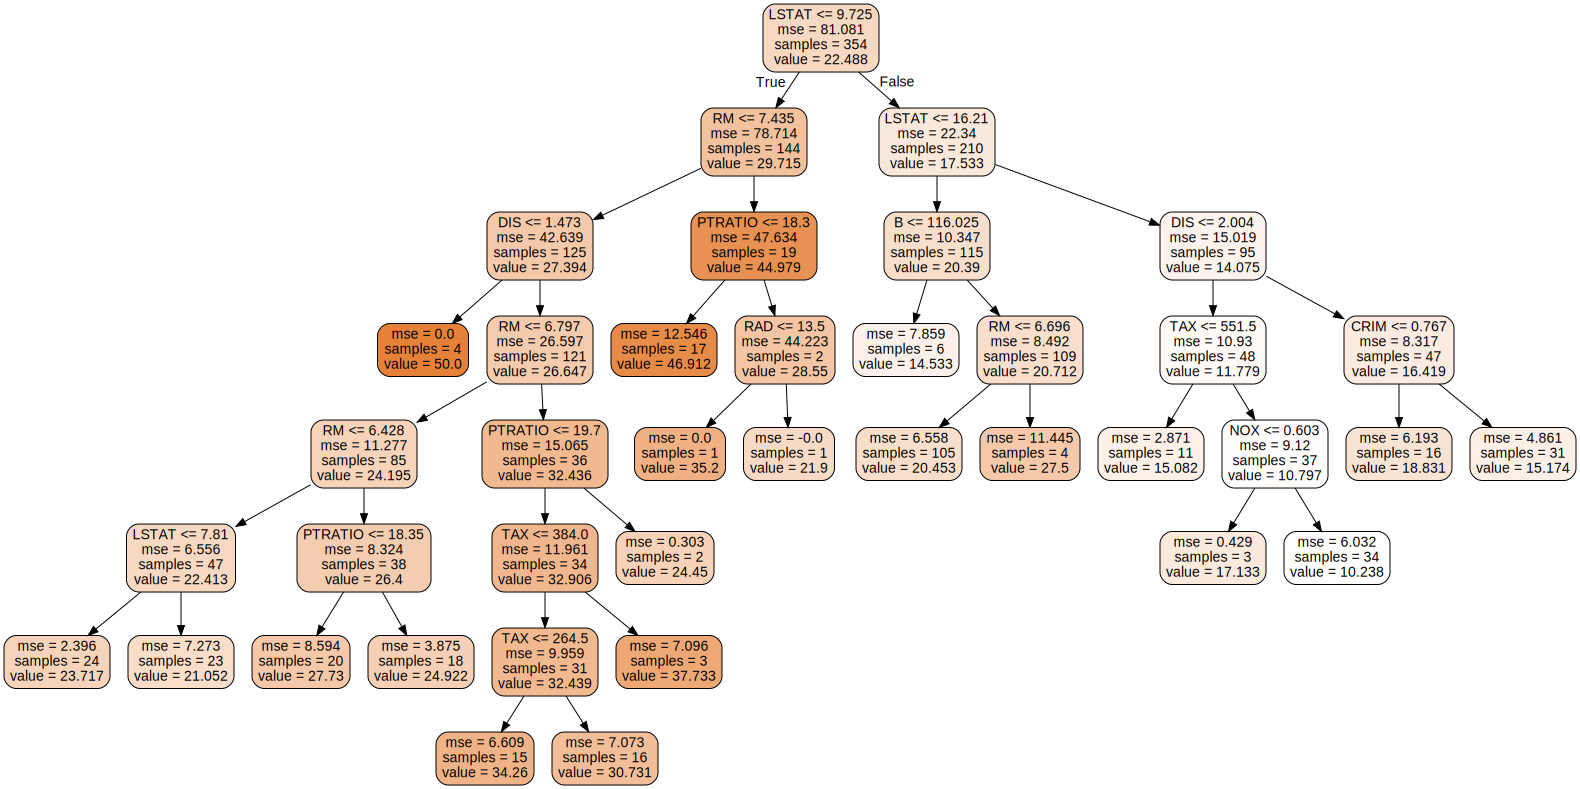

<Figure size 1440x1440 with 0 Axes>

In [19]:
plt.figure(figsize = (20,20))
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=names,  
                                class_names=boston_dataset.target,
                                filled=True, rounded= True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

We'll learn how to custom paint your graph from the default settings (coming soon)

In [20]:
"""import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        print(node.get_label())
        node.set_fillcolor('yellow')
        

graph.write_png('colored_tree.png')
"""

"import pydotplus\ngraph = pydotplus.graph_from_dot_data(dot_data)\nnodes = graph.get_node_list()\n\nfor node in nodes:\n    if node.get_label():\n        print(node.get_label())\n        node.set_fillcolor('yellow')\n        \n\ngraph.write_png('colored_tree.png')\n"

### 2. Regressions

Regression is a problem where you need to find a function that maps some features or variables to others sufficiently well.<br>
Dependent features are called the dependent variables. <br>
Independent features are called the independent variables. <br>

Regression is useful to forecast a response using a set of predictors. <br>
When implementing linear regression of some dependent variable y on set of independent variables x, 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. is called the regression equation. 𝜀 is the random error.

Useful Resources -> <br>

* https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Lecture/lecture03_2020JC.html#1
* https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f#:~:text=%E2%80%9CA%20method%20of%20estimating%20the,observed%20data%20is%20most%20probable.%E2%80%9D&text=By%20assuming%20normality%2C%20we%20simply,the%20popular%20Gaussian%20bell%20curve.
* https://online.stat.psu.edu/stat462/node/207/
* https://psychscenehub.com/psychpedia/odds-ratio-2/
* http://statkat.com/stat-tests/logistic-regression.php#:~:text=Logistic%20regression%20analysis%20tests%20the,%3D%CE%B2K%3D0

Regression analysis involves identifying the relationship between a dependent variable and one or more independent variables. <br>
A model of the relationship is hypothesized, and estimates of the parameter values are used to develop an estimated regression equation. <br>
<br><br>
**Regression Model** <br>
In simple linear regression, the model used to describe the relationship between a single dependent variable y and a single independent variable x is y = β0 + β1x + ε. <br>
β0 and β1 are referred to as the model parameters,and ε is a probabilistic error term that accounts for the variability in y that cannot be explained by the linear relationship with x <br><br>
The difference between the observed value of y and the value of y predicted by the estimated regression equation is called a residual.<br>

**Key Assumptions ->** <br>
* ε is a random variable with an expected value of 0
* the variance of ε is the same for all values of x
* the values of ε are independent,
* ε is a normally distributed random variable.

**Residual Analysis ->** <br><br>
The analysis of residuals plays an important role in validating the regression model. <br>
If the error term satisfies the above 4 assumptions, then the regression model is valid. 

So-called dummy variables are used to represent qualitative variables in regression analysis. In general, k - 1 dummy variables are needed to model the effect of a qualitative variable that may assume k values.

An F-Test based on MSR / MSE can be used to test the statistical significance of the overall relationship between the dependent variable and the set of independent variables. <br>
Large values of F support the conclusion that the overall is statistically significant. 

**Key Terms ->** <br><br><br>
* Coefficient of Determination -> R^2, tells you the amount of variation in y based on the dependence on x. Larger R^2 indicates a better fit and means that the model can 
* Coefficient of Correlation -> 
* SSE ->
* SSR -> Sum of Squared Residuals
* SST -> 
* Error Term ε -> 
* Regression Equation -> 
* Correlation Equation -> 
* Estimated Regression Equation -> 
* Regression Model ->
* F Statistic -> 
* MSE
* MSR
* Dummy Variable -> A variable that takes values of 0 or 1 and is used to consider the effect of qualitative variables in a regression model
* Correlation vs Causation -> 
* Standard Error ->
* Confidence Interval Estimate -> The interval estimate of the mean value of y for a given value of x.
* OLS -> Method of Ordinary Least Squares. To get the best model weights, we use the method of OLS to minimize the SSR. 

1. Linear Regression Analysis

Regression tries to search for relationships among variables. 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [23]:
model = LinearRegression()

model.fit(X,y)

r2_score = model.score(X,y)
print("Coefficient of Determination -> " , r2_score)

print("Intercept -> ", model.intercept_)
print("Slope -> ", model.coef_)

Coefficient of Determination ->  0.7158756137479542
Intercept ->  5.633333333333329
Slope ->  [0.54]


2. Multiple Regression Analysis

Multiple or multivariate linear regression is linear regression with two or more independent variables. <br>
Polynomial Regression is considered a generalized case of linear regression. You assume polynomial dependence between the output and the input.  Which means, the regression equation can now include non-linear terms. 

In [24]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

X = np.array(x)
y = np.array(y)


model = LinearRegression()

model.fit(X,y)


r2_score = model.score(X,y)

print("Coefficient of Determination -> ", r2_score)

print("Model Intercept => ", model.intercept_)

print("Slope => ", model.coef_)

Coefficient of Determination ->  0.8615939258756775
Model Intercept =>  5.52257927519819
Slope =>  [0.44706965 0.25502548]


#### Linear Regression using statsmodels

In [25]:
import statsmodels.api as sm

In [26]:
x = [[0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [60,35]]
y = [4,5,20,14,32,22,38,43]

x, y = np.array(x), np.array(y)


x = sm.add_constant(x)

model = sm.OLS(y, x)


results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sat, 17 Apr 2021   Prob (F-statistic):            0.00713
Time:                        17:34:58   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [27]:
print("Coefficient of Determination -> ", results.rsquared)

print("Adjusted Coefficient of Determination => ", results.rsquared_adj)

print("Regression coefficients => ", results.params)

Coefficient of Determination ->  0.8615939258756776
Adjusted Coefficient of Determination =>  0.8062314962259487
Regression coefficients =>  [5.52257928 0.44706965 0.25502548]


**(Bonus or Optional) Polynomial Regression with Scikit-Learn** <br>
In polynomial regression, you need to transform the inputs to include non-linear terms.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])


transformer = PolynomialFeatures(degree = 2, include_bias = False)

x = transformer.fit_transform(x)

model = LinearRegression().fit(x,y)

r2_score = model.score(x,y)

print("Coefficient of Determination => ", r2_score)

print("Intercept -> ", model.intercept_)
print("Coefficients => ", model.coef_)

Coefficient of Determination =>  0.8908516262498563
Intercept ->  21.37232142857144
Coefficients =>  [-1.32357143  0.02839286]


Neither regression nor correlation analyses can be interpreted as establishing cause-and-effect relationships. <br><br> They can indicate only how or to what extent variables are associated with each other.<br><br> The correlation coefficient measures only the degree of linear association between two variables. Any conclusions about a cause-and-effect relationship must be based on the judgment of the analyst.

### 3. Chi Square Test

background -> 

* used to analyze the frequencies of two variables with multiple categories to determine their independency
* qualitative variables
* nominal data

degrees of freedom for the chi-squared distribution -> (rows -1) * (cols -1)

a. Understanding Contigency Tables (also known as crosstab)

* useful for multiple population proportions
* classify sample observations according to two or more characterstics
* also called cross-classification table

Contigency tables are the pivot tables obtained by utilizing the categorical variable. The contigency here is whether a variable affects the values of the caegorical variable. <br>


b. Performing Chi-Square Tests

c. Chi-Square Tests for Feature Selection

**Assumption** -> each cell in the contigency table has expected frequency atleast **5**

![](https://media.geeksforgeeks.org/wp-content/uploads/Capture-214.png)

#### Note:- Used only for Categorical Features.

Dataset used -> https://www.kaggle.com/c/cat-in-the-dat

In [30]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 


data = pd.read_csv('../input/cat-in-the-dat/train.csv')

In [31]:
data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [32]:
data.drop(['id'], axis = 1, inplace = True)

In [33]:
data.dtypes

bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [34]:
for col in data.columns:
    print(col, data[col].nunique())

bin_0 2
bin_1 2
bin_2 2
bin_3 2
bin_4 2
nom_0 3
nom_1 6
nom_2 6
nom_3 6
nom_4 4
nom_5 222
nom_6 522
nom_7 1220
nom_8 2215
nom_9 11981
ord_0 3
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192
day 7
month 12
target 2


In [35]:
for col in data.columns:
    print(col, '\n\n',data[col].value_counts())
    print('-'*10)

bin_0 

 0    261749
1     38251
Name: bin_0, dtype: int64
----------
bin_1 

 0    223018
1     76982
Name: bin_1, dtype: int64
----------
bin_2 

 0    185033
1    114967
Name: bin_2, dtype: int64
----------
bin_3 

 T    153535
F    146465
Name: bin_3, dtype: int64
----------
bin_4 

 Y    191633
N    108367
Name: bin_4, dtype: int64
----------
nom_0 

 Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64
----------
nom_1 

 Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64
----------
nom_2 

 Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64
----------
nom_3 

 Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64
----------
nom_4 

 Oboe        92293
Piano       84517
Bassoon     68448
T

bin_3, bin_4 has T/F values. <br>
nom_0, nom_1, nom_2, nom_3, nom_4 have 3-6 unique values. <br>
nom_5, nom_6, nom_7, nom_8, nom_9 have many unique values <br>
THen comes the ordinal variables

In [36]:
data['bin_3'] = data['bin_3'].map({"T" : 1, "F" : 0})
data['bin_4'] = data['bin_4'].map({"Y" : 1, "N" : 0})

In [37]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


We're done with dealing of binary variables. <br>
Now we're left to deal with the nominals & ordinals.

We have 5 ordinal variables of which 4 have few unique values and can be dealt in a similar manner. <br>
ord_5 has multiple unique values and needs to be handled separately. 

In [38]:
for col in ['ord_1', 'ord_2', 'ord_3', 'ord_4']:
    print(col, list(np.unique(data[col])))

ord_1 ['Contributor', 'Expert', 'Grandmaster', 'Master', 'Novice']
ord_2 ['Boiling Hot', 'Cold', 'Freezing', 'Hot', 'Lava Hot', 'Warm']
ord_3 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
ord_4 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [39]:
m1_ord1 = {'Novice' : 0, 'Contributor' : 1, 'Expert' : 2, 'Master' : 3, 'Grandmaster' : 4}

data['ord_1'] = data['ord_1'].map(m1_ord1)

In [40]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,Cold,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,Hot,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,Freezing,a,R,qP,7,8,0


In [41]:
m2_ord2 = {'Boiling Hot' : 0, 'Cold' : 1, 'Freezing' : 2, 'Hot' : 3, 'Lava Hot' : 4, 'Warm' : 5}

data['ord_2'] = data['ord_2'].map(m2_ord2)

In [42]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,1,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,3,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,4,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,0,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,2,a,R,qP,7,8,0


In [43]:
data['ord_3'] = data['ord_3'].apply(lambda x : ord(x) - ord('a'))
data['ord_4'] = data['ord_4'].apply(lambda x : ord(x) - ord('A'))

In [44]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,1,7,3,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,3,0,0,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,4,7,17,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,0,8,3,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,2,0,17,qP,7,8,0


In [45]:
data['ord_5a'] = data['ord_5'].str[0]
data['ord_5b'] = data['ord_5'].str[1]

data['ord_5a'] = data['ord_5a'].map({val : idx for idx, val in enumerate(np.unique(data['ord_5a']))})
data['ord_5b'] = data['ord_5b'].map({val : idx for idx, val in enumerate(np.unique(data['ord_5b']))})

In [46]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,4,1,7,3,kr,2,2,0,36,43
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,4,3,0,0,bF,7,8,0,27,5
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,2,4,7,17,Jc,7,2,0,9,28
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,4,0,8,3,kW,2,1,1,36,22
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,4,2,0,17,qP,7,8,0,42,15


Let's deal the nominal variables.

In [47]:
data[['nom_0', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']]

,nom_0,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
0,Green,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51
1,Green,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21
2,Blue,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0
3,Red,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71
4,Red,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7
...,...,...,...,...,...,...,...,...,...
299995,Red,Snake,India,Oboe,35f65a9bf,788ba7aea,86a8e4ca0,7508f4ef1,e027decef
299996,Green,Lion,Russia,Piano,472efea17,3b9693870,c4455f4a8,397dd0274,80f1411c8
299997,Blue,Axolotl,Russia,Oboe,0dee9b39a,6046454de,ba9901303,5d7806f53,314dcc15b
299998,Green,Axolotl,Costa Rica,Piano,e1558b071,0000ee65f,c8ae4ea14,1f820c7ce,ab0ce192b


In [48]:
data['nom_1'].value_counts()

Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64

In [49]:
data['nom_2'].value_counts()

Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64

In [50]:
data['nom_3'].value_counts()

Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64

In [51]:
data['nom_4'].value_counts()

Oboe        92293
Piano       84517
Bassoon     68448
Theremin    54742
Name: nom_4, dtype: int64

In [52]:
data['nom_5'].value_counts()

f7821e391    2801
06eeaf0aa    2750
472efea17    2729
20b10a832    2725
b97f51ac4    2717
             ... 
91c80026f      64
88f104c00      59
f802a9849      46
1fd0233cd      41
f710fca39      26
Name: nom_5, Length: 222, dtype: int64

In [53]:
data['nom_6'].value_counts()

d173ac7ca    1218
2ed5a94b0    1210
c9eedfbc2    1193
50d7ad46a    1175
0922e3cb8    1169
             ... 
26bf5ddd9      16
28630a5c8      12
8367b78fc      11
e97824431       8
4dcab4fc8       5
Name: nom_6, Length: 522, dtype: int64

In [54]:
data['nom_7'].value_counts()

3a114adea    534
3b679e531    518
6f3940b72    518
fcf2b8dce    517
fe27cc23d    515
            ... 
2b5df4f24      3
f718e6e9c      3
446df0c98      3
74a1b69b1      2
3460d7c4b      1
Name: nom_7, Length: 1220, dtype: int64

In [55]:
data.drop(['ord_5', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis = 1, inplace = True)

In [56]:
"""data['day'] = data['day'] / 7.0

data['month'] = data['month'] / 12.0"""

"data['day'] = data['day'] / 7.0\n\ndata['month'] = data['month'] / 12.0"

In [57]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,2,4,1,7,3,2,2,0,36,43
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,1,4,3,0,0,7,8,0,27,5
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,1,2,4,7,17,7,2,0,9,28
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,1,4,0,8,3,2,1,1,36,22
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,1,4,2,0,17,7,8,0,42,15


Let's encode the remaining of the nominal values

In [58]:
data['nom_1'].value_counts()

Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64

In [59]:
m1_nom1 = {'Trapezoid' : 0, 'Square' : 1, 'Star' : 2, 'Circle' : 3, 'Polygon' : 4, 'Triangle' : 5}

data['nom_1'] = data['nom_1'].map(m1_nom1)

In [60]:
data['nom_2'].value_counts()

Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64

In [61]:
m2_nom2 = {'Lion' : 0, 'Cat' : 1, 'Snake' : 2, 'Dog' : 3, 'Axolotl' : 4, 'Hamster' : 5}
data['nom_2'] = data['nom_2'].map(m2_nom2)

In [62]:
data['nom_3'].value_counts()

Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64

In [63]:
m3_nom3 = {'Russia' : 0, 'Canada' : 1, 'China' : 2, 'Finland' : 3, 'Costa Rica' : 4, 'India' : 5}

data['nom_3'] = data['nom_3'].map(m3_nom3)

In [64]:
data['nom_4'].value_counts()

Oboe        92293
Piano       84517
Bassoon     68448
Theremin    54742
Name: nom_4, dtype: int64

In [65]:
m4_nom4 = {'Oboe' : 0, 'Piano' : 1, 'Bassoon' : 2, 'Theremin' : 3}

data['nom_4'] = data['nom_4'].map(m4_nom4)

In [66]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,Green,5,2,3,2,2,4,1,7,3,2,2,0,36,43
1,0,1,0,1,1,Green,0,5,0,1,1,4,3,0,0,7,8,0,27,5
2,0,0,0,0,1,Blue,0,0,0,3,1,2,4,7,17,7,2,0,9,28
3,0,1,0,0,1,Red,0,2,1,0,1,4,0,8,3,2,1,1,36,22
4,0,0,0,0,0,Red,0,0,1,0,1,4,2,0,17,7,8,0,42,15


In [67]:
data['nom_0'].value_counts()

Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64

In [68]:
m0_nom0 = {'Green' : 0, 'Blue' : 1, 'Red' : 2}

data['nom_0'] = data['nom_0'].map(m0_nom0)

Perform One Hot Encoding of the ordinal features

Label Encoding multiple columns

In [69]:
df_copy = data.copy()
df_copy.drop(['target'], axis = 1, inplace = True)

In [70]:
df_copy = pd.get_dummies(df_copy, columns = df_copy.columns)
df_copy

,bin_0_0,bin_0_1,bin_1_0,bin_1_1,bin_2_0,bin_2_1,bin_3_0,bin_3_1,bin_4_0,bin_4_1,...,ord_5b_41,ord_5b_42,ord_5b_43,ord_5b_44,ord_5b_45,ord_5b_46,ord_5b_47,ord_5b_48,ord_5b_49,ord_5b_50
0,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
299996,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
299997,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
299998,1,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,0,5,2,3,2,2,4,1,7,3,2,2,0,36,43
1,0,1,0,1,1,0,0,5,0,1,1,4,3,0,0,7,8,0,27,5
2,0,0,0,0,1,1,0,0,0,3,1,2,4,7,17,7,2,0,9,28
3,0,1,0,0,1,2,0,2,1,0,1,4,0,8,3,2,1,1,36,22
4,0,0,0,0,0,2,0,0,1,0,1,4,2,0,17,7,8,0,42,15


In [72]:
#X = data.drop(['target'], axis = 1)
X = df_copy
y = data.target

In [73]:
# perform feature engineering to encode categorical variables so as to be processed by chi2_feature transform

In [74]:
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(X,y)

print("Original Number of Features -> (shape)", X.shape[1])

print("K Best Features (shape)-> ",X_kbest_features.shape[1])



Original Number of Features -> (shape) 212
K Best Features (shape)->  10


In [75]:
X_kbest_features

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

##### solving chi2 test generic questions and numericals using python 

q1. A survey of 500 respondents is depicted in the table below. <br> (In Making)



|Type| No regular Exercise  | Sporadic Exercise | Regular Exercise | Total  |
|----|-----|----|----|-----|
|Dormitory| 32  | 30 | 28 | 90 |
|On-Campus Apartment| 74 | 64 | 42 | 180 |
|Off-Campus Apartment| 110  | 25  | 15  | 150  |
|At home| 39 | 6 | 5 | 50 |
|Total | 255 | 125 | 90 | 470


<br>Based on the above data, is there any relationship between exercise and student's living arrangement? <br>


Soln. 


H0 -> Living arrangement and exercise are independent <br><br>
H1 -> Are dependent 


### 4. T-Test

t-test also known as Student's t-test compares the two averages (means) and tells you if they are different from each other. <br>
Can also tell you how significant the differences are. 

**t-score**

**T-Values vs P-Values**

Types of T-Test <br>
* Independent Samples t-test
* Paired Sample t-test
* One Sample t-test

### 5. Z-Test

Helps to determine whether the distribution of the test statistics can be approximated by a normal distribution. <br>
Helps to determine whether two sample means are approximately the same when their variance is known and the sample size is large enough.

Q1. The grades on a physics midterm at Covington are roughly symmetric with μ=72, σ=2.0. <br>
Stephanie scored 74 on the exam. <br>
Z-Score to stephanie's exam score. 

In [76]:
z = (74 - 72 )/ 2

print(z)

1.0


Q2. Following are the summary statistics of life spans of two breeds of cats. <br>

| Breed  |Mean Life Span (yrs)   | Standard Deviation  |  
|---|---|---|
| Abyssinian  | 12  | 1.5  | 
| Colorpoint shorthair  |  14 | 1  |   

Fluffy was an Abyssinian cat who lived for 13 years, and Mittens was a colorpoint shorthair cat who lived for 15 years.<br>
Relative to the breed, which cat had a longer life span? <br><br>

* Fluffy 
* Mittens
* Fluffy and Mittens had equally long lifespans relative to their breeds.
* It's impossible to say without seeing all of the individual lifespans.
* It's impossible to say since we don't know the shape of either distribution.

In [77]:
z1 = (13 - 12) / 1.5

z2 = (15 - 14) / 1

print("Z Score for Fluffy -> ", z1)
print("Z Score for Mittens -> ", z2)

Z Score for Fluffy ->  0.6666666666666666
Z Score for Mittens ->  1.0


Mittens had a longer lifespan

### 6. ANOVA Test

ANOVA -> Analysis of Variance. <br>
Helps to compare the means of more than 2 groups. <br>
ANOVA F Test is also called omnibus test. <br><br><br>

Main types of ANOVA Test -> 
* One-way or One-factor 
* Two-way or Two-factor

ANOVA Hypotheses -> <br>
* Null Hypotheses = Group means are equal. No variation in the groups. 
* Alternative Hypothesis = At least, one group is different from other groups.

ANOVA Assumptions -> <br><br>
* Residuals(experimental error) are normally distributed.(Shapiro-Wilks Test)
* Homogenity of variances (variances are equal between treatment groups) (Levene's or Bartlett's Test)
* Observations are sampled independently from each other. 

ANOVA Working -> <br><br>
* Check sample sizes, i.e., Equal number of observations in each group. 
* Calculate Mean Square for each group (MS) (SS of group/degrees of freedom-1)
* Calc Mean Sq. Error (SS Error / df of residuals)
* Calc F value (MS of group / MSE)

#### 6.1 One-Way ANOVA Test

In [78]:
import random

In [79]:
random.seed(2021)

In [80]:
df = pd.DataFrame([random.sample(range(1, 1000), 4) , random.sample(range(1, 1000), 4), random.sample(range(1, 1000), 4), random.sample(range(1, 1000), 4)], columns = ['A', 'B', 'C', "D"])

In [81]:
df

,A,B,C,D
0,857,414,879,645
1,558,284,254,900
2,651,36,997,455
3,486,589,66,321


In [82]:
df_melt = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = ['A','B','C','D'])
df_melt.columns = ['index', 'treatments', 'value']

In [83]:
df_melt

,index,treatments,value
0,0,A,857
1,1,A,558
2,2,A,651
3,3,A,486
4,0,B,414
5,1,B,284
6,2,B,36
7,3,B,589
8,0,C,879
9,1,C,254


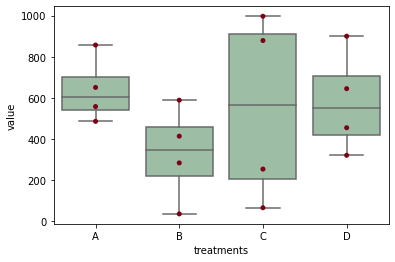

In [84]:
sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [85]:
from scipy import stats

In [86]:
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print("f Value -> ", fvalue)
print("p value -> ", pvalue)

f Value ->  0.8173829088134379
p value ->  0.5087624005681269


In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('value ~ C(treatments)', data = df_melt).fit()

anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),216518.5,3.0,0.817383,0.508762
Residual,1059569.5,12.0,NaN,NaN


##### Interpretation

p-value obtained from ANOVA Analysis is not significant (p > 0.05), and therefore, we conclude that there are no significant differences amongst the groups. 

#### 6.2 Two-Way ANOVA Test

In Two-Way ANOVA Test, we have 2 independent variables and their different levels

In [88]:
data = pd.DataFrame(list(zip(['A','A','A','B','B','B', 'C', 'C', 'C', 'D', 'D', 'D'], [np.random.ranf() for _ in range(12)], [np.random.ranf() for _ in range(12)], [np.random.ranf() for _ in range(12)])), columns = ['Genotype', '1_year', '2_year', '3_year'])

In [89]:
data

,Genotype,1_year,2_year,3_year
0,A,0.798880,0.242349,0.895479
1,A,0.444203,0.301017,0.241322
2,A,0.688146,0.575508,0.334106
3,B,0.921730,0.283969,0.570733
4,B,0.484762,0.646569,0.500490
5,B,0.843816,0.679019,0.311152
6,C,0.008298,0.582349,0.591713
7,C,0.403753,0.762290,0.709969
8,C,0.801937,0.347441,0.527536
9,D,0.983361,0.660600,0.555842


In [90]:
data_melt = pd.melt(data, id_vars = ['Genotype'], value_vars = ['1_year', '2_year', '3_year'])

In [91]:
data_melt.head()

,Genotype,variable,value
0,A,1_year,0.798880
1,A,1_year,0.444203
2,A,1_year,0.688146
3,B,1_year,0.921730
4,B,1_year,0.484762


In [92]:
data_melt.columns = ['Genotype', 'years', 'value']

<AxesSubplot:xlabel='Genotype', ylabel='value'>

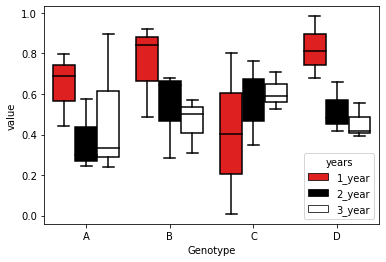

In [93]:
sns.boxplot(x = 'Genotype', y = 'value', hue = 'years', data = data_melt, palette = ['r', 'k', 'w'])

In [94]:
model = ols('value ~ C(Genotype) + C(years) + C(Genotype) : C(years)', data = data_melt).fit()

In [95]:
anova_table = sm.stats.anova_lm(model, typ = 2)

anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),0.057341,3.0,0.404836,0.750861
C(years),0.190343,2.0,2.015782,0.155155
C(Genotype):C(years),0.356145,6.0,1.257226,0.313552
Residual,1.133115,24.0,NaN,NaN


##### Post-Hoc Analysis (Tukey's Test)

In [96]:
!pip install -q bioinfokit
from bioinfokit.analys import stat

In [97]:
res = stat()
res.tukey_hsd(df = df_melt, res_var = 'value', xfac_var = 'treatments', anova_model = 'value ~ C(treatments)')
output = res.tukey_summary

In [98]:
output

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,307.25,-316.636933,931.136933,2.067987,0.488263
1,A,C,89.00,-534.886933,712.886933,0.599026,0.900000
2,A,D,57.75,-566.136933,681.636933,0.388694,0.900000
3,B,C,218.25,-405.636933,842.136933,1.468961,0.714050
4,B,D,249.50,-374.386933,873.386933,1.679293,0.634770
5,C,D,31.25,-592.636933,655.136933,0.210332,0.900000


All the values are in accordance to the condition p > 0.05 <br>
Hence, aren't statistically significant.

### 7. F Stats Test

### 8. Binomial Distribution

In [99]:
from scipy.stats import binom

n = 6
p = 0.6

r_values = list(range(n + 1))

mean, var = binom.stats(n, p)


dist = [binom.pmf(r, n, p) for r in r_values]

df = pd.DataFrame(list(zip(r_values, dist)), columns = ['r', 'p(r)'], index = None)

df

,r,p(r)
0,0,0.004096
1,1,0.036864
2,2,0.138240
3,3,0.276480
4,4,0.311040
5,5,0.186624
6,6,0.046656


<AxesSubplot:>

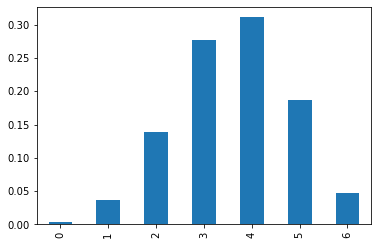

In [100]:
df['p(r)'].plot.bar()

### 9. Normal Distribution

also known as 
* Gaussian Distribution
* Bell Curve


<br><br> Below is the probability distribution function (pdf) for Normal Distribution -> 

![](https://cdn.askpython.com/wp-content/uploads/2020/10/Probability-density-function-of-Normal-Distribution.jpg.webp)

* x -> input value
* mu -> mean
* sigma -> std deviation

![](https://cdn.askpython.com/wp-content/uploads/2020/10/Standard-deviation-around-mean.jpg.webp)

In [101]:
mu, sigma = 0.5, 1

In [102]:
data = np.random.normal(mu, sigma, 10000)

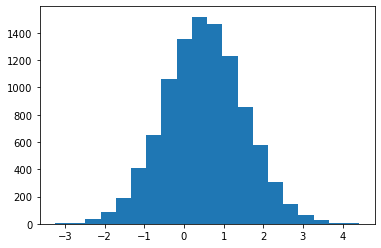

In [103]:
count, bins, ignored = plt.hist(data, 20)



### 10. Poisson Distribution

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1539784818/output_39_0_knqrjh.png)

Note -> Normal Distribution is a limiting case of poisson distribution when lambda -> inf. 

In [104]:
from scipy.stats import poisson
data_poisson =poisson.rvs(mu = 3, size = 10000, random_state= 2021)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

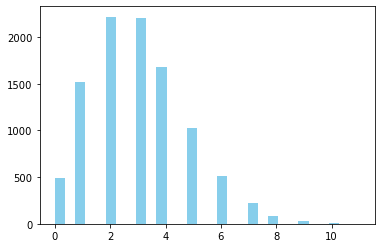

In [105]:
sns.distplot(data_poisson, bins = 30, kde = False, 
            color = 'skyblue',
             hist_kws = {'linewidth' : 15, 'alpha' : 1}
            )



### 11. Bernoulli Distribution

A bernoulli distribution has only 2 possible outcomes, 1 (success) and 0 (failure). <br>
Eg. A coin toss. <br>

### 12. Central Limit Theorem

**What it states?** <br><br>
Even when a sample is not normally distributed, if you draw multiple samples and take each of their averages, the averages will represent a normal distribution.<br><br>
Which means repeated sampling from a not normally distributed sample and taking the means of those repeated samples will end up being a normally distributed sample. <br><br>

100 samples in total which are not normally distributed. Take random 10 samples say 50 times and take the mean of these samples. It will come out to be a normally distributed sample.

The following is an experiment of dice roll for 1000 times. <br>
for 1000 times, we make samples of samples size 100 where possible outcomes are 1,2,3,4,5,6 <br><br>
By plotting the histogram of the sample means, we obtain a normally distributed plot. <br>
This is Central Limit Theorem

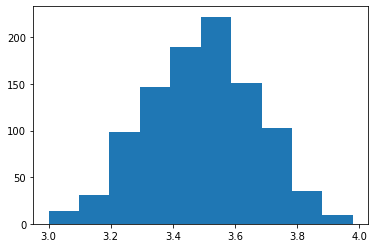

In [106]:

means = [np.mean(np.random.randint(1, 7, 100)) for _ in range(1000)]

plt.hist(means)
plt.show()

##### Key Takeaways :- <br><br>

![](https://miro.medium.com/max/366/1*RdIQG331j0tayi50asTOIw.png)

![](https://miro.medium.com/max/418/1*dCxzo7E6lmKxHLEg2xZSoQ.png)

You can never experiment with all your customers (population). However, to draw a conclusion for an experiment which is a good representaion of your customers, you need to perform repeated experiments on different set of customers (different samples of the not normally distributed population/sample as per the context) and confirm your hypotheses. 

### 13. Calculating p-Value

![](https://miro.medium.com/max/963/1*0XXmFcatWBkagH3YeYdpig.png)

p-value is all about answering the question with certain confidence level. <br>
eg. I am 90% confident that I will get that job. 

**In p-value tests, our task might be to find the probability that a sample mean could be x, given the hypothesis that the population mean is y.** <br>

<br>
Conclusion => <br>
The p-value gives us the probability of observing what we observed, given the hypothesis is true. It doesn't tell us the probability that the null hypothesis is true.

**How it works?** <br>
Statement (Null Hypothesis) -> 

In [107]:
def pvalue(mu, sigma, samp_size, samp_mean = 0, deltam = 0):
    
    np.random.seed(2021)
    

COnsidering Means -> Use t-test

![](https://media.geeksforgeeks.org/wp-content/uploads/20200503190751/Annotation-2020-05-03-190733-300x92.png)

Considering Proportions -> z test

![](https://media.geeksforgeeks.org/wp-content/uploads/20200503191805/Annotation-2020-05-03-191654-300x92.png)

## Solving Questions on Distributions using python

Q1. Calculate the probability of getting 14 heads in 20 attempts from a fair coin.

In [108]:
# It is a problem of binomial distribution. N = 20, p = 0.5, q = 0.5, x = 14


# use the probability mass function to evaluate the probability
print(stats.binom.pmf(k = 14, n = 20, p = 0.5))

0.03696441650390614


Q2. A question paper contains 90 multiple choice questions. There are four alternatives answers to each question of which only one is correct. What is the probability to score atleast 22 marks without any preparation (random guessing).

In [109]:
## Again a question of binom distribution. N = 90, k = 22, p = 0.25


# In this question, we'll be using cumulative distribution function and subtract the outcome from 1. 
# Find the cumulative probability till k = 21 and subtract it from 1 so that outcome is >= 22 marks
1 - stats.binom.cdf(k = 21, n = 90, p = 0.25)

0.5885826169612627

Q3. On an average 5% items supplied by a manufacturer are defective. If a batch of 10 items is inspected, what is the probability that 2 items are defective. 

In [110]:
### Binomial Distribution problem

## Defective sample is to be considered as success. p = 0.05, N = 10, k = 2

stats.binom.pmf(k = 2, n= 10, p = 0.05)

0.07463479852001954

Q4. A car distributor experiences on an average 3 car sales per day. Find the probability that on a randomly selected day they will sell 
1. 5 cars.
2. 0 Cars
3. At most 2 cars
4. exactly 1 car

In [111]:
## Since we are dealing with discrete occurences over an interval, this is the case of poisson distribution.
# x = 5, mu = 3
stats.poisson.pmf(5, 3)

0.10081881344492458

In [112]:
## Case ii. x = 0, mu = 3

stats.poisson.pmf(0,3)

0.049787068367863944

In [113]:
# Case iii. x <= 2, mu = 3

stats.poisson.cdf(2, 3)

0.42319008112684364

In [114]:
## Case iv. x = 1, mu = 3

stats.poisson.pmf(1,3)

0.14936120510359185

Q5. The weight of football players is normally distributed with mean of 200 pounds and a standard deviation of 25 pounds. Find the probability of a player weighing
1. more than 241.25 pounds
2. less than 250 pounds.

In [115]:
# part 1
# x = 241.25
# loc = 200
# scale = 25

# P(z > 241.25)

1 - stats.norm.cdf(241.25, 200, 25)

0.0494714680336481

In [116]:
# part 2

# x = 250
# loc = 200
# scale = 25

# P(z < 250)

stats.norm.cdf(250, 200, 25)

0.9772498680518208

Q6. Assuming a binomial experiment with p = 0.5 and a sample size of 100. The expected value of this distribution is?

In [117]:
# Expected value of a binomial experiment is np

0.5 * 100

50.0

Q7. Probability of acceptance of a student in a college is 0.3 <br>
If 5 students apply, probability that at most 2 are selected?

In [118]:
stats.binom.cdf(2, 5, 0.3)

0.8369199999999999

Q8. Probability of obtaining 45 or fewer heads in 100 tosses of a coin?

In [119]:
stats.binom.cdf(45, 100, 0.5)

0.18410080866334827

Q9. Suppose a die is tossed 5 times. Probability of getting exactly 2 fours?

In [120]:
stats.binom.pmf(2,5, 0.167)

0.16120107977393003

Q10. An average light bulb manufactured by the Acme Corporation lasts 300 days with a standard deviation of 50 days. Assuming that bulb life is normally distributed, what is the probability that an Acme light bulb will last at most 365 days?

In [121]:
stats.norm.cdf(365, 300, 50)

0.9031995154143897

Q11. Suppose scores on an IQ test are normally distributed. If the test has a mean of 100 and a standard deviation of 10, what is the probability that a person who takes the test will score between 90 and 110?

In [122]:
stats.norm.cdf(110, 100, 10) - stats.norm.cdf(90, 100, 10)

0.6826894921370859

Q12. Suppose the average number of lions seen on a 1-day safari is 5. What is the probability that tourists will see fewer than four lions on the next 1-day safari?

In [123]:
stats.poisson.cdf(3, 5)

0.2650259152973616

Q13. The average number of homes sold by the Acme Realty company is 2 homes per day. What is the probability that exactly 3 homes will be sold tomorrow?

In [124]:
stats.poisson.pmf(2,3)

0.22404180765538775

Q14. Suppose scores on an IQ test are normally distributed, with a mean of 100. Suppose 20 people are randomly selected and tested. The standard deviation in the sample group is 15. What is the probability that the average test score in the sample group will be at most 110?

Q15. Acme Corporation manufactures light bulbs. The CEO claims that an average Acme light bulb lasts 300 days. A researcher randomly selects 15 bulbs for testing. The bulbs last an average of 290 days, with a standard deviation of 50 days. If the CEO's claim were true, what is the probability that 15 randomly selected bulbs would have an average life of no more than 290 days?

Q16. Suppose we select 5 cards from an ordinary deck of playing cards. What is the probability of obtaining 2 or fewer hearts?

### 14. Measuring Correlation

The strength of the association between two variables is known as correlation test. <br>
If we want to know the relation between height and weight of human beings, a dataset of the same is to be obtain and correlation is to be found to justify or reject the above hypothesis. 

* r takes values -1 to +1 
* r = 0 means no correlation
* can't be applied to ordinal variables
* the sample size should be moderate 20 to 30. 
* outliers can lead to misleading calculations

![](https://media.geeksforgeeks.org/wp-content/uploads/20200311233526/formula6.png)

In [125]:
random.seed(2021)
lst1 = random.sample(range(100), 50)
print("Elements of 1st list -> ", lst1, "\n")


lst2 = random.sample(range(100), 50)
print("Elements of 2nd list -> ", lst2, "\n")


Elements of 1st list ->  [51, 80, 69, 35, 31, 81, 4, 56, 60, 73, 8, 40, 34, 37, 91, 9, 20, 21, 6, 13, 70, 86, 94, 68, 59, 14, 25, 92, 96, 67, 43, 47, 50, 74, 28, 95, 75, 65, 30, 7, 41, 87, 66, 29, 61, 18, 89, 17, 0, 1] 

Elements of 2nd list ->  [68, 96, 29, 24, 21, 31, 51, 54, 74, 83, 47, 88, 33, 6, 35, 9, 10, 22, 91, 57, 28, 81, 17, 92, 50, 34, 55, 82, 76, 77, 60, 36, 13, 44, 1, 80, 37, 72, 40, 7, 4, 32, 5, 27, 20, 63, 86, 46, 53, 90] 



In [126]:
corr, _ = stats.pearsonr(lst1, lst2)

print("Pearsons correlation : ", corr)

Pearsons correlation :  0.23250778094287392


Inference -> A value close to 0 means there is no correlation between the values of the elements. We can say there is slight but insignificant correlation between the values

### 15. Measuring Variance

Variance -> Measures how far from their mean the individual observations in dataset are. <br>
Std Deviation -> Square root of variance is std deviation which measures the amount of dispersion of the dataset.

In [127]:
def variance(data):
    
    n = len(data)
    
    mean = sum(data)/n
    
    deviations = [(x - mean) ** 2 for x in data]
    
    variance = sum(deviations) / n
    
    return variance

In [128]:
random.seed(2021)
data = random.sample(range(1000), 10)

variance(data)

78529.56

Variance estimate of the population using sample data

In [129]:
def variance(data , dof = 0):
    
    n = len(data)
    mean = sum(data) / n
    
    return sum((x - mean)** 2 for x in data) / (n - dof)



In [130]:
variance(data, dof = 1)

87255.06666666667

Standard deviation is the square root of the variance value calculated. <br><br><br>
Values that are within one standard deviation of the mean can be thought of as fairly typical. <br>
Those values which are three or more standard deviations away from the mean can be considered as **outliers**. 

### 16. Sample Statistics

### 17. Population Statistics

### 18. Maximum Likehood Estimation

MLE is a method to find the most likely density function that would have generated the data. <br>
The likelihood function depends on mean 'mu' and variance σ2 which is found through an iterative process using calculators or computers.<br>


|  S.No | Likelihood   | Probability  |
|---|---|---|
| 1  | Refers to past events with known outcomes  | Refers to the occurence of future outcomes  |
| 2  | eg. A coin is flipped 10 times and 10 heads occur. Likelihood the coin is an unbiased coin?  | eg. A coin flipped n times. Probability of getting heads.| 
| 3  | Sum of Likelihoods != 1  | Sum of Probabilities = 1  |  

**Steps to perform MLE:** <br>
* Perform a certain experiment to collect data
* Choose parametric model of the data
* Formulate the likelihood as an objective function to be maximized 
* Maximize the objective func and derive the parameters of the model


**Examples** -> <br>
* Coin Toss to find the probabilities of heads and tails
* Dart throwing

Note :- For linear regression models, we use Ordinary Least Squares (OLS) to fit the regression model and estimate the parameters B0 & B1. <br>
**MLE** is based on the data we observe, what are the model parameters that maximize the likelihood of the observed data occuring?

**Applications ->** <br>
The parameters of a logistic regression model can be estimated by the probabilistic framework called Maximum Likelihood Estimation.

The outputs of a logistic regression are class probabilities.

**Brief Overview** -> <br>
![](https://miro.medium.com/max/421/1*ayxQCn3xz6sm41KRjf3Ygw.gif)

![](https://miro.medium.com/max/721/1*6MTXtB4zipiDMguZrlXSlA.gif)

In statistics, MLE is widely used to obtain the parameter for a distribution. In this paradigm, 

In this paradigm, to maximize log likelihood, we need to minimize the cost function. <br>
![](https://miro.medium.com/max/774/1*VAb-6NSg2vwUtqCtfNdjrA.gif)

Gradient Descent algorithm is used to tweak the values of the cost function using MLE. 

### 19. Cluster Analysis

Cluster Analysis is an unsupervised technique of grouping objects together based on their properties. By doing so, the objects in one group are more similar to each other than to those in other groups.

Cluster Analysis vs Discriminant Analysis

Cluster Analysis assigns objects to various groups without any prior object labels whereas Discriminant Analysis uses such knowledge which was defined in advance.

**Distance Functions**

Minkowski Distance <br><br>
A generalization of both the Euclidean and the manhattan metric is the Minowski distance given by :- <br>


![](https://slideplayer.com/slide/5070455/16/images/16/Minkowski+Distance+Minkowski+distance%3A+a+generalization.jpg)

![](https://www.researchgate.net/publication/349155159/figure/fig1/AS:989596292767746@1612949550717/Three-typical-Minkowski-distances-ie-Euclidean-Manhattan-and-Chebyshev-distances.png)

Understanding various distance functions -> <br>
Both euclidean and manhattan distance satisfy the following -> 
* d(i,j) >= 0
* d(i,j) = d(j,i)
* d(i,j) >= d(i,h) + d(h,j)
* d(i,i) != 0

#### 19. i. K Means Clustering

![](https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png)

**Ways to choose optimal number of clusters** -> <br>
1. Elbow Method
2. Silhouette coefficient

In [131]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

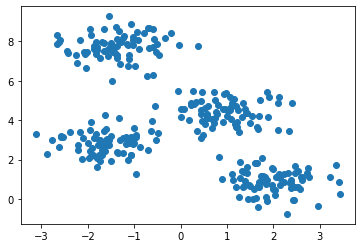

In [132]:
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)


plt.scatter(X[:,0], X[:,1])

Elbow Method

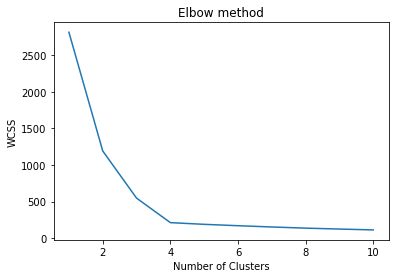

In [133]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

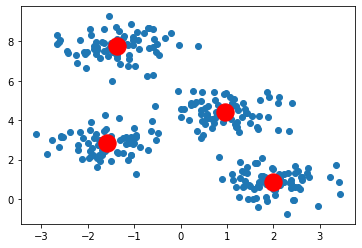

In [134]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Silhouette Analysis Method

In [135]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [136]:
n_clusters = [2,3,4,5,6,7,8,9]


for n_cluster in n_clusters:
    
    clusterer = KMeans(n_clusters = n_cluster, random_state = 10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("\nFor n_clusters = ", n_cluster, "\nThe average silhouette_score is : ", silhouette_avg)
    


For n_clusters =  2 
The average silhouette_score is :  0.5426422297358302

For n_clusters =  3 
The average silhouette_score is :  0.5890390393551769

For n_clusters =  4 
The average silhouette_score is :  0.6819938690643478

For n_clusters =  5 
The average silhouette_score is :  0.5923875148758644

For n_clusters =  6 
The average silhouette_score is :  0.4993450440592758

For n_clusters =  7 
The average silhouette_score is :  0.424399822715831

For n_clusters =  8 
The average silhouette_score is :  0.3249897986721672

For n_clusters =  9 
The average silhouette_score is :  0.34339638088479935


As we can see, for n = 4, we obtain the highest silhouette score. <br>
This is exactly the same number we obtained using elbow method as well as it is the number of clusters we have defined in our dataset.

#### 19. ii. K-Mediods

**K-Means** clustering algorithm is sensitive to **outliers** as mean value is easily influenced by **extreme values**. <br>
**K-Mediods** is a variant of K-Means which is more robust to noises and outliers.

In [137]:
!pip install -q https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip


In [138]:
from sklearn_extra.cluster import KMedoids

kmediods = KMedoids(n_clusters = 3, random_state = 0).fit(X)

In [139]:
kmediods.labels_

array([1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0])

#### 19. iii. Agglomerative Clustering

In [140]:
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc

In [141]:
df = pd.read_csv('../input/ccdata/CC GENERAL.csv')

X = df.drop(['CUST_ID'], axis = 1)

X.fillna(method = 'ffill', inplace = True)

In [142]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


X_normalized = normalize(X_scaled)


X_normalized = pd.DataFrame(X_normalized)

In [143]:
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146906,0.103137,-0.066350,-0.071056,-0.026406,-0.092925,0.252792,-0.135103,0.234873,-0.134444,-0.094773,-0.069757,-0.191193,-0.096793,-0.068374,0.235693,-0.820733
8946,-0.151150,0.105477,-0.067009,-0.072668,-0.025006,-0.095033,0.258527,-0.138169,0.240202,-0.137494,-0.096923,-0.071340,-0.195531,-0.102486,-0.069925,-0.106997,-0.839354
8947,-0.156989,-0.039327,-0.085230,-0.075682,-0.062527,-0.098974,0.181198,-0.143898,0.161244,-0.143196,-0.100942,-0.082828,-0.203640,-0.120989,-0.069834,0.069801,-0.874162
8948,-0.154334,-0.038414,-0.097250,-0.073925,-0.094148,-0.093066,-0.253040,-0.140558,-0.189920,0.032626,-0.037901,-0.122568,-0.227375,-0.120236,-0.070536,0.068181,-0.853872


In [144]:
from sklearn.decomposition import PCA 


pca = PCA(n_components = 2)


x_pca = pca.fit_transform(X_normalized)

x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['P1', 'P2']

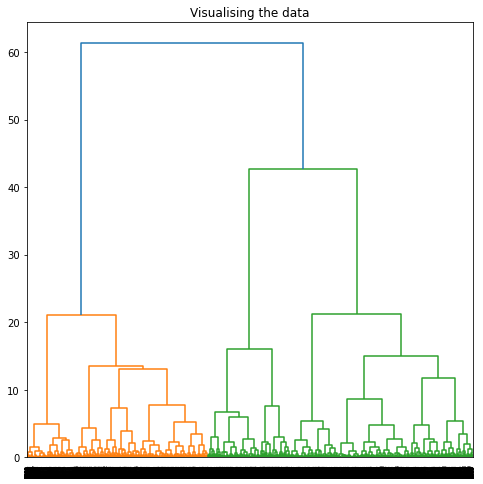

In [145]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x_pca, method ='ward')))

We can use silhouette scores to find the optimal number of clusters.

### 20. Hypothesis Testing

It is a statistical method used for making statistical decisions using experimental data. <br>
Used to evaluate two mutually exclusive statements in a population to determine which statement is best supported using the sample data.

![](https://miro.medium.com/max/481/1*2vTwIrqdELKJY-tpheO7GA.jpeg)

Standardized Normal Curve <br>
Which means it is a normal distribution curve which is standardized (mean = 0, std = 1).

Normal Curve -> 
![](https://miro.medium.com/max/626/1*gBnxoTRwo9sDovvegHfm6g.png)

**Important Terminologies ->** <br><br><br>
**Level of Significance** => the degree of significance in which we accept or reject the nuol hypothesis. A 5% significance means the the result should be atleast 95% confident to give a similar result in each sample. 

### 21. Type-I Error & Type-II Error

Type I Error

When you reject the null hypothesis but thay hypothesis was true. Type I error is denoted by alpha. The region that shows the critical region , is called the alpha region. <br>

Type II Error

When we accept null hypothesis but it is false. Denoted by Beta. The normal curve that shows the acceptance region is called the beta region. 

One tailed Test

A statistical test in which the region of **rejection** is only on **one** side of the sampling distribution. 

Two Tailed Test

A **two-tailed** test is a statistical **test** in which the critical area of distribution is **two-sided** and tests are adopted as whether the samples aare greater than or less than some critical values. If the sample being tested falls in either of the critical values, the alternate hypothesis is accepted instead of the null hypothesis. 

P-Value

The **p-Value**, or calculated probability, of finding extreme results when the null hypothesis is true. <br>
If your p value is less than the chosen significance level, you reject the null hypothesis. 

**Degree of Freedom** -> <br>


**Widely Used hypothesis testing types ->** <br>
* T Test (Student T Test)
* Z Test
* ANOVA Test
* Chi-Square Test

### 22. Z-Stats & T-Stats

T-Test <br>
Type of inferential statistics used to determine if there is a significant difference between means of two groups which may be related in certain features. <br>
Used when the datasets would follow a normal distribution and may have unknown variances. 

We have two types of T-Tests -> <br>
* 1 sample t-test
* 2 sample t-test

One Sample t-test -> <br>


2 Samples t-test -> <br>
        Compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are statistically different. <br>
        Also known as **Independent t-test**

**Paired sampled t-test** -> <br>
Also known as dependent sample t-test. <br>
Univariate test that tests for a significant difference between 2 related variables. 

Z-Test <br>
Use Z-test if -> <br>
* Sample Size > 30
* Data points **independent** from each other. 
* Data should be normally distributed. Sometimes, if the sample size is large enough, this doesn't matter. 
* Data items have equal chance of getting selected. 

One-Sample Z-Test

In [146]:
from statsmodels.stats import weightstats as stests




Two Sample Z-Test

ANOVA test or F-Test

One-Way F-Test (Anova) -> <br>


Two-Way F-Test (Anova) -> 

Chi-Sq Test

KS Test

KS Test is used to check if given values follow a distribution. <br>


In [147]:
np.random.seed(2021)
v = np.random.normal(size = 100)

res = stats.kstest(v, 'norm')

print(res)

KstestResult(statistic=0.09091978889293212, pvalue=0.3584836633568587)


### 23. Confidence Interval

It is a range of values. <br>
95% confidence interval is the most common. <br>
Note -> 95% confidence interval doesn't mean 95% probability. 

**Calculation of confidence interval** <br>


In [148]:
def mean_confidence_interval(data, confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n - 1)
    
    return m, m - h, m + h

I. Confidence interval for a sample

II. Confidence Interval with a small sample

III. Confidence Interval with the Normal Distribution / Z-Distribution

IV. Confidence Interval for a proportion

V. Confidence Interval for 2 populations or (proportions)

In a local teaching district a technology grant is available to teachers in order to install a cluster of four computers in their classrooms. From 6250 teachers in the district, 250 were randly selected and asked if they felt that computers were an essential teaching tool for their classroom. Of those selected, 142 teachers felt that computers were an essential teaching tool. <br>
1. Calculate a 99% confidence interval for the propertion of teachers who felt that computers are an essential teaching tool. <br>
2. How could the survey be changed to narrow the confidence interval but to maintain the 99% confidence interval?

### 24. Confusion Matrix, ROC & Regression Analysis

**Confusion Matrix** <br><br>

We'll learn confusion matrix for both Binary Classifiers as well as Multi Class Classifiers. 

![](https://miro.medium.com/proxy/0*-oGC3SE8sPCPdmxs.jpg)

I. Binary Classifiers 

In [149]:
# Let's assume the following was a confusion matrix obtained for a Binary Dataset

In [150]:
from sklearn.metrics import confusion_matrix

In [151]:
y_true = [0,1,0,1,0,1]
y_pred = [0,0,1,1,0,1]

confusion_matrix(y_true, y_pred)

array([[2, 1],
       [1, 2]])

With the help of confusion matrix, we can obtain values for TN, FP, FN, TP

In [152]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("True Negatives -> ", tn)
print("False Positives -> ", fp)
print("False Negatives -> ", fn)
print("True Positives -> ", tp)

True Negatives ->  2
False Positives ->  1
False Negatives ->  1
True Positives ->  2


Let's define a function to output all the metrics needed to gauge model performance. <br>

In [153]:
def calculate_performance(tn, fp, fn, tp):
    
    
    accuracy = (tp + tn)/ (tp + tn + fp + fn)
    
    precision = tp / (tp + fp)
    
    recall = tp / (tp + fn)
    
    f1 = ( 2 * precision * recall ) / (precision + recall)
    
    
    return accuracy, precision, recall, f1

In [154]:
acc, precision, recall, f1 = calculate_performance(tn, tp, fn, tp)

print("Accuracy of the hypothetical model -> ", acc)
print("Precision of the hypothetical model -> ", precision)
print("Recall of the hypothetical model -> ", recall)
print("F1-score of the hypothetical model -> ", f1)

Accuracy of the hypothetical model ->  0.5714285714285714
Precision of the hypothetical model ->  0.5
Recall of the hypothetical model ->  0.6666666666666666
F1-score of the hypothetical model ->  0.5714285714285715


You can also display the output of your confusion matrix in a better visual format

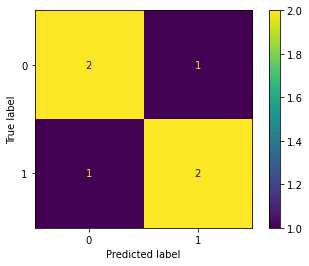

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred),
                               display_labels=[0,1])

disp.plot()

II. Multi-Class Classifiers

In [156]:
# For multi-class classifiers, let's understand how to obtain the metrics given the hypothetical confusion matrix.

In [157]:
y_true = [0,1,2, 0,1,2,0,1,2]
y_pred = [0,2,1,0,1,2,1,0,1]

confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 1, 1],
       [0, 2, 1]])

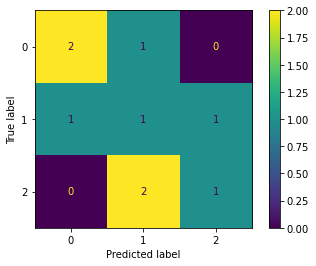

In [158]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred),
                               display_labels=[0,1,2])

disp.plot()

How to read a multi-class confusion matrix?

![](https://miro.medium.com/max/875/1*uQDpo9iISx00ucl3gftLVA.png)

Now we need to calculate TP, FN, FP, TN values. 

In [159]:
def calculate_metrics_multi(cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy for each class
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    f1 = 2 * precision * recall / (precision + recall)
    
    print("The calculated metrics are as follows -> \n\n")
    print(f"\n1. Accuracy = {ACC} \n2. Recall or Sensitivity = {TPR} \n3. Specificity or True Negative Rate = {TNR} \n4. Precision = {PPV} \n5. Negative Predictive Value = {NPV} \n6. Fall out or False Positive Rate = {FPR} \n7. False Negative Rate = {FNR} \n8. False Discovery Rate = {FDR} \n9. F1-Score = {f1}")

In [160]:
calculate_metrics_multi(confusion_matrix(y_true, y_pred))

The calculated metrics are as follows -> 



1. Accuracy = [0.77777778 0.44444444 0.66666667] 
2. Recall or Sensitivity = [0.66666667 0.33333333 0.33333333] 
3. Specificity or True Negative Rate = [0.83333333 0.5        0.83333333] 
4. Precision = [0.66666667 0.25       0.5       ] 
5. Negative Predictive Value = [0.83333333 0.6        0.71428571] 
6. Fall out or False Positive Rate = [0.16666667 0.5        0.16666667] 
7. False Negative Rate = [0.33333333 0.66666667 0.66666667] 
8. False Discovery Rate = [0.33333333 0.75       0.5       ] 
9. F1-Score = 0.5714285714285715


**Receiver Operating Characteristic** <br>


**What is it?** <br>
ROC is a plot useful for predicting the probability of a binary outcome. <br>
It is the plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0 <br>

![](https://developers.google.com/machine-learning/crash-course/images/ROCCurve.svg)

**Area Under the ROC Curve** -> <br>
AUC provides aggregate measure of performance across all possible classification thresholds. 

**AUC is desirable for 2 reasons** -> <br>
* Scale invariant 
* classification-model-threshold invariant

**Q. How would multiplying all of the predictions from a given model by 2.0 (for example, if the model predicts 0.4, we multiply by 2.0 to get a prediction of 0.8) change the model's performance as measured by AUC?** <br><br>
Ans. No change. AUC only cares about relative prediction scores.

**Thresholding in ROC**

The aim of the plot is to analyze the predictive power of the predictor 

While selecting threshold, you should visualize the following graph for threshold selection and

![](https://miro.medium.com/max/644/1*P2qKi7w1UHF7zg6SnCGTag.png)

analyze the performance based on the following ROC curve generated.

![](https://miro.medium.com/max/601/1*QkWHqoSHSBig31InTzr8TA.jpeg)

* If you aim for very low FPR, you might pick up a 

**Poor Classifier** <br><br>
![](https://miro.medium.com/max/764/1*HVvNkWufhzGj2s0sc4CyIw.png)

Understanding the influence of threshold on the ROC Curve -> <br>
There are 2 possible cases for ROC Curve's threshold movement -> <br>
* Shifting the threshold to the right
* Shifting the threshold to the left

In such a scenario, never remember the standard TPR vs FPR diagram for ROC Curve. Rather Refer to the following diagram -> <br>
![](https://lukeoakdenrayner.files.wordpress.com/2018/01/threshold2.png?w=656)

**Case I : Shifting the threshold to the right**<br>
This would case TP to decrease, FP to decrease, FN to increase and TN to increase. <br>
By doing so, TPR or Sensitivity (which is TP / Sum(+ves)) decreases. FPR (which is (FP / Sum(-ves) ) decreases. If FPR decreases, specificity increases as FPR = 1 - specificity.

**Case I : Shifting the threshold to the left**<br>
This would case TP to increase, FP to increase, FN to decrease and TN to decrease. <br>
By doing so, TPR or Sensitivity (which is TP / Sum(+ves)) increases. FPR (which is (FP / Sum(-ves) ) increases. If FPR increases, specificity decreases as FPR = 1 - specificity.

Concluding Remarks about ROC & AUC Curves -> <br>
* can be used as a summary of the model skill
* ROC Curves of different models can be compared directly in general or for different thresholds.
* Shape of ROC curves contains info about the predictive power of the model.
* for imbalanced class distribution, ROC curves are very helpful. Helps to visualize the trade-off between TPR and FPR and thus help us to arrive at a threshold that minimizes the mis-classification cost.

![](https://miro.medium.com/max/603/1*D05sMUrwZIgvwsQVF_CJdg.jpeg)

**Regression Analysis**

Output of a regression analysis is usually a summary statistic that includes: <br>
* R 
* R squared
* adjusted R-squared
* standard error of the estimate

**Use regression analysis to ->** <br><br>
* Model multiple independent variables
* use polynomial terms to model the curvature. 
* include continuous and categorical variables
* assess interaction terms to determine affect of one independent variable on the value of another variable.

### 25. Summary Statistics

#### I. Central Tendency Statistics

a. Arithmetic Mean

Given a set of numbers -> [n1,n2,n3,n4,n5]<br><br>

Average or **Arithmetic Mean** -> Sum of dataset / num of data items <br>
-> (n1 + n2 + n3 + n4 + n5) / 5 


In [161]:
data1 = np.arange(1, 10, 2)
data1

array([1, 3, 5, 7, 9])

In [162]:
print("Mean of the above data set is => ", np.mean(data1))

Mean of the above data set is =>  5.0


b. Weighted Mean

For calculating weighted mean, <br>
you would require two lists. <br>
* The data items list
* The corresponding weights list

In [163]:
data1 = np.arange(1, 21, 2)
data1

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [164]:
weights = np.random.random(len(data1))
weights

array([0.71764771, 0.1482483 , 0.39368226, 0.80261811, 0.81018863,
       0.7960028 , 0.85798945, 0.29674024, 0.15884363, 0.68614311])

In [165]:
def weighted_mean(data_lst, weights_lst):
    return np.average(data_lst, weights = weights_lst)

In [166]:
print("Weighted Mean is -> ", weighted_mean(data1, weights))

Weighted Mean is ->  9.904349686689075


c. Median

Median for **odd** number of elements is the middle most element. <br>
Median for **even** number of elements is the average of the middle two elements. <br>

case 1 : even number of elements

In [167]:
data1 = np.arange(1, 21, 2)
data1

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [168]:
np.median(data1)

10.0

case 2: odd number of elements

In [169]:
data1 = np.arange(1, 10, 2)
data1

array([1, 3, 5, 7, 9])

In [170]:
print("Median of the above dataset is -> ", np.median(data1))

Median of the above dataset is ->  5.0


d. Percentile

Percentile is calculated by assuming the highest or maximum value in a dataset as the upper limit and relative to that value other values are calculated indicating how far or near they are.

We'll be generating the following percentile values for the dataset -> <br>
* 50th Percentile / Median
* 25th Percentile
* 75th Percentile

case 1. 1D dataset

In [171]:
data1 = random.sample(range(1000), 20)
data1

[996,
 454,
 485,
 588,
 65,
 320,
 276,
 303,
 486,
 78,
 935,
 909,
 165,
 168,
 849,
 54,
 761,
 106,
 689,
 733]

In [172]:
print('25th Percentile -> ', np.percentile(data1, 25))

25th Percentile ->  167.25


In [173]:
print('50th Percentile -> ', np.percentile(data1, 50))

50th Percentile ->  469.5


In [174]:
print('75th Percentile -> ', np.percentile(data1, 75))

75th Percentile ->  740.0


case 2. 2D dataset

In [175]:
random.seed(2021)

data = [random.sample(range(100), 4), 
       random.sample(range(100), 4),
       random.sample(range(100), 4)]
data

[[51, 80, 69, 35], [31, 81, 4, 56], [60, 73, 8, 40]]

In [176]:
print("25th percentile value for axis = None -> ", np.percentile(data, 25,))
print("25th percentile value for axis = 0 -> ", np.percentile(data, 25,axis = 0))
print("25th percentile value for axis = 1 -> ", np.percentile(data, 25,axis = 1))

25th percentile value for axis = None ->  34.0
25th percentile value for axis = 0 ->  [41.  76.5  6.  37.5]
25th percentile value for axis = 1 ->  [47.   24.25 32.  ]


In [177]:
print("50th percentile value for axis = None -> ", np.percentile(data, 50,))
print("50th percentile value for axis = 0 -> ", np.percentile(data, 50,axis = 0))
print("50th percentile value for axis = 1 -> ", np.percentile(data, 50,axis = 1))

50th percentile value for axis = None ->  53.5
50th percentile value for axis = 0 ->  [51. 80.  8. 40.]
50th percentile value for axis = 1 ->  [60.  43.5 50. ]


In [178]:
print("75th percentile value for axis = None -> ", np.percentile(data, 75,))
print("75th percentile value for axis = 0 -> ", np.percentile(data, 75,axis = 0))
print("75th percentile value for axis = 1 -> ", np.percentile(data, 75,axis = 1))

75th percentile value for axis = None ->  70.0
75th percentile value for axis = 0 ->  [55.5 80.5 38.5 48. ]
75th percentile value for axis = 1 ->  [71.75 62.25 63.25]


#### II. Dispersion

a. Skewness

* skewness = 0, normally distributed
* skewness > 0, more weight in the left tail of the distribution
* skewness < 0, more weight in the right tail of the distribution

![](https://media.geeksforgeeks.org/wp-content/uploads/skewness.jpg)

Skewness of the data -->  2.184420217406685


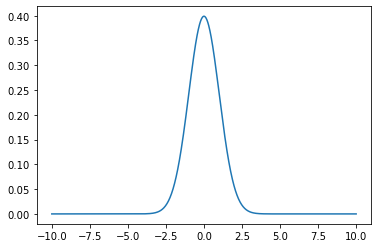

In [179]:
from scipy.stats import skew
import pylab
x1 = np.linspace(-10, 10, 1000)
y1 = 1./ (np.sqrt(2. * np.pi)) * np.exp(-.5 * (x1) ** 2)

pylab.plot(x1, y1)

print("Skewness of the data --> ", skew(y1))

Skewness of the data ->  1.719723672010651


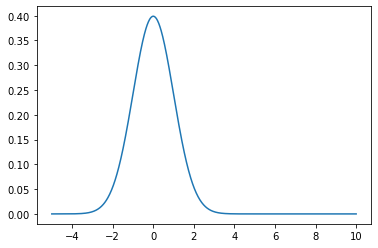

In [180]:
x1 = np.linspace(-5, 10, 1000)
y1 = 1./ (np.sqrt(2. * np.pi)) * np.exp(-.5 * (x1) ** 2)

pylab.plot(x1, y1)

print("Skewness of the data -> ", skew(y1))

In [181]:
x = np.random.normal(0, 2, 10000)


print("X: \n", x)

print("\nSkewness for data : ", skew(x))

X: 
 [-1.36857157  0.90803555 -1.45033216 ...  2.02615376  0.18323387
 -3.29878223]

Skewness for data :  -0.013029260340621438


b. Kurtosis

It helps in the measure of how heavy the tail is in compared to a normal distribution.

![](https://media.geeksforgeeks.org/wp-content/uploads/kurtosis.jpg)

Kurtosis for normal distribution :  1.4908202196578797
Kurtosis for normal distribution :  4.49082021965788
Kurtosis for normal distribution :  1.4908202196578797


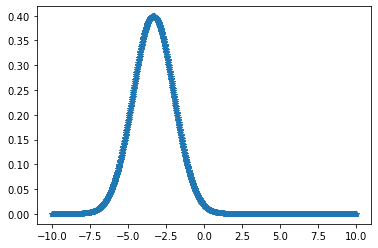

In [182]:
x = np.linspace(-10, 10, 1000)
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )


pylab.plot(x,y1, '*')

print("Kurtosis for normal distribution : ", stats.kurtosis(y1))

print("Kurtosis for normal distribution : ", stats.kurtosis(y1, fisher = False))

print("Kurtosis for normal distribution : ", stats.kurtosis(y1, fisher = True))

c. Range

Range is the span of values in the entire dataset. <br>
Range is denoted by [min_value, max_value]

In [183]:
random.seed(2021)
data1 = random.sample(range(-1000, 1000), 100)
#data1

In [184]:
min_value = min(data1)

max_value = max(data1)

print(f"Range of the dataset -> [{min_value},{max_value}]")

Range of the dataset -> [-990,993]


d. Interquartile Range

Interquartile range also called as midspread, or middle 50% or technically H-spread. <br>
Technically, it is the Q3 - Q1 where Q3 is the third quartile and the first quartile. <br>
It covers the center of the distribution and contains 50% of the observations. <br><br>

**IQR** = **Q3 - Q1**

##### Applications -> <br>
* helps in easy identification of outlier values
* gives the central tendency of the data.
* higher the IQR, higher the variablity.
* lower the IQR, the preferable the dataset is.

In [185]:



random.seed(2021)

data = random.sample(range(1000), 30)

print(f"Dataset -> {data}\n\n")
IQR = stats.iqr(data, interpolation = 'midpoint')

print(IQR)

Dataset -> [856, 413, 878, 644, 557, 283, 253, 899, 650, 35, 996, 454, 485, 588, 65, 320, 276, 303, 486, 78, 935, 909, 165, 168, 849, 54, 761, 106, 689, 733]


482.5


e. Variance

Variance is the square of the difference of a variable from its mean. <br>
It measures the spread of random data in a set from its mean or median value. <br>
* Low value for variance indicates the data are clustered together.
* High value for variance indicates the data are spread widely.

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7b0fdc0b3c4d7ef2aeeba85f690456c2_l3.svg)

In [186]:
print(f"Variance of the sample set --> {statistics.variance(data)}")

Variance of the sample set --> 95338.27126436781


f. Standard Score or Z-Score

**z-score** tells us how many standard deviations away a value is from the mean.

z = (X – μ) / σ


In [187]:
import scipy.stats as stats

In [188]:
stats.zscore(data)

array([ 1.1849736 , -0.27428318,  1.25744233,  0.48663853,  0.20005763,
       -0.70250751, -0.80132851,  1.32661703,  0.50640273, -1.51942778,
        1.64613827, -0.13922781, -0.03711278,  0.30217266, -1.42060678,
       -0.58062828, -0.72556575, -0.63662685, -0.03381874, -1.37778435,
        1.44520223,  1.35955737, -1.09120345, -1.08132135,  1.16191536,
       -1.45684115,  0.87204043, -1.28555142,  0.63487003,  0.7798075 ])

Here each z-score tells us how many std. deviations each value is away from mean.

g. Coefficient of Variation

It is the ratio of standard deviation to mean. 

In [189]:
np.random.seed(2021)
data1 = np.random.randn(5,5)

print("\nVariation at axis = 0: \n", stats.variation(data1, axis = 0))
print("\nVariation at axis = 1: \n", stats.variation(data1, axis = 1))


Variation at axis = 0: 
 [ 3.52845528  3.3470547   1.80598357 -1.59881564 -5.15100563]

Variation at axis = 1: 
 [ 2.74078274  1.91282102 -2.02345542 -3.0812028   2.00687297]


### 26. Familiarizing with different error metrics

SST 

Sum of Squares Total - the squared difference between the observed dependent variable and its mean.<br>
SST is also denoted as TSS or total sum of squares.

SSR

Sum of differences between the predicted value and the mean of the dependent variable.

if SSR = SST, our regression model captures all the observed variablity and its perfect. <br>
ESS -> Explained sum of squares.

SSE

The error is the difference between the observed value and the predicted value. <br>
We want to minimize the error. The smaller the error, the better the estimation power of the regression. <br>


#### Relation between SST, SSR, SSE

SST = SSR + SSE <br>
The total variability = Explained Variability + Unexplained Variability

**Mean Squared Error** -> <br>
1/n * SSE <br><br>
**Root Mean Squared Error** -> <br>
sqrt(MSE) <br><br>
**R Squared** -> <br>
1 - SSE / SST <br><br>
**Adjusted R-squared** -> <br>
1 - (n + k / n - k) * (1 - R**2) 

**MSR ->** <br><br>

Mean Square due to regression, <br>
SSR / 

### 27. Simmilarity and Dissimilarity Index

### 28. Logistic Regression

**Assumptions of Logistic Regression ->** <br>
* Binary Logistic Regression requires the dependent variable to be binary
* The variables should be independent of each other. That is, the model should have little or no multicollinearity. 
* Samples sizes should be preferably large. 
* 

#### I. Python Implementation

In [190]:
df = pd.read_csv("../input/logistic-regression-stats-dataset/logit_train1.csv", index_col = 0)

Xtrain = df[['gmat', 'gpa', 'work_experience']]
ytrain = df[['admitted']]


log_reg = sm.Logit(ytrain, Xtrain).fit()


print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.352707
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.4912
Time:                        17:46:57   Log-Likelihood:                -10.581
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 3.668e-05
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gmat               -0.0262      0.011     -2.383      0.017      -0.048      -0.005
gpa           

#### II. Calculating G-Statistic

G - statistic in logistic regression is -> <br>
-2ln[ likelihood without variable/ likelihood with variable]

Applications of G-Statistic -> <br>
* Helps to verify the overall significance of the model
* 

Wald Test -> <br>
Measures an individual independent variable's significance

### Notebook in Making.  <br>
Est. Date of Completion - 28-03-2021